### Necessary imports

In [2]:
##necessary imports
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tqdm import tqdm
from scipy.spatial import cKDTree
import matplotlib.cm as cm
import networkx as nx
from matplotlib import colorbar
import tifffile

### Data pre-processing

In [3]:
#Data normalization function
def normalize_dataframe(df, columns_to_normalize):
    # Create a copy of the dataframe
    df_normalized = df.copy()

    # Replace missing values with 0 in the selected columns
    #df_normalized[columns_to_normalize] = df_normalized[columns_to_normalize].fillna(0)

    # Normalize selected columns
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df_normalized[columns_to_normalize].values)
    df_normalized[columns_to_normalize] = scaled_values

    return df_normalized

In [ ]:
#use gdown to download the example files from my Google Drive (I will come up with another solution for this!)

#!pip install gdown

!gdown "https://drive.google.com/uc?id=1tdCvEDQiXsVDA7Xu_BEDfgoeKxleaBsE"
!gdown "https://drive.google.com/uc?id=13b5l2EFdq0DG5KwTU-AS8PeLBgLdZ9fZ"
!gdown "https://drive.google.com/uc?id=1m4Ai0lASGHJrJbKvpafZM5_CThZ9qgOv"
!gdown "https://drive.google.com/uc?id=1KFni26c3XDv0F8umewQzmfSbG-gbk5AK"

In [ ]:
#Reading in full dataset which contains manual annotations of tracks

full_df = pd.read_csv("./full_manual_dataset_cropped_Exp2.csv")

full_df2 = pd.read_csv('./full_csv_cropped_Exp1.csv')

full_df3 = pd.read_csv('./full_csv_cropped_Exp3.csv')

full_df4 = pd.read_csv('./full_csv_cropped_Exp4.csv')

In [5]:
#second dataset
def calculate_position_time(frame, time_interval):
    if frame <= 160:
        return frame * 1.82 * time_interval
    else:
        return ((160 * 1.82 * time_interval) + ((frame - 160) * (2.83 * time_interval)))

In [6]:
#sixth dataset
def calculate_position_time2(frame, time_interval):
    if frame <= 119:
        return frame * 1.49 * time_interval
    elif frame <= 219:
        return ((119 * 1.49 * time_interval) + ((frame - 119) * (2.00 * time_interval)))
    else:
        return ((119 * 1.49 * time_interval) + (100 * 2.00 * time_interval) + ((frame - 219) * (2.99 * time_interval)))

In [7]:
#fifth dataset
def calculate_position_time3(frame, time_interval):
    if frame <= 114:
        return frame * 2.59 * time_interval
    else:
        return ((114 * 2.59 * time_interval) + ((frame - 114) * (3.99 * time_interval)))

In [8]:
#third dataset
def calculate_position_time4(frame, time_interval):
    if frame <= 180:
        return frame * 0.95 * time_interval
    elif frame <= 300:
        return ((180 * 0.95 * time_interval) + ((frame - 180) * (1.99 * time_interval)))
    else:
        return ((180 * 0.95 * time_interval) + (120 * 1.99 * time_interval) + ((frame - 300) * (3.00 * time_interval)))

In [9]:
full_df2['t_hours'] = [calculate_position_time(t, 100) / 3600 for t in full_df2['Spot frame'].to_list()]

In [10]:
full_df3['t_hours'] = [calculate_position_time3(t, 100) / 3600 for t in full_df3['Spot frame'].to_list()]

In [11]:
full_df4['t_hours'] = [calculate_position_time4(t, 100) / 3600 for t in full_df4['Spot frame'].to_list()]

### Calculating normalized Z position

In [ ]:
# Define search radius
radius = 100

# Create an empty column for Z_norm
full_df['POSITION_Z_norm'] = np.nan

# Process each timepoint separately
for t in tqdm(full_df['Spot frame'].unique()):
    subset = full_df[full_df['Spot frame'] == t].copy()
    if len(subset) < 2:
        continue  # Skip if there are no neighbors to compare

    # Extract X, Y, Z as NumPy arrays for performance
    xy = subset[['POSITION_X', 'POSITION_Y']].values
    z_values = subset['POSITION_Z'].values

    # Create KDTree
    tree = cKDTree(xy)

    # Find neighbors for all points at once
    neighbors_list = tree.query_ball_tree(tree, r=radius)

    # Compute Min-Max normalization efficiently
    z_norm_values = np.zeros(len(subset))

    for i, neighbors in enumerate(neighbors_list):
        if len(neighbors) > 1:  # Ignore self-only neighbors
            neighbor_z = z_values[neighbors]  # Get Z values of neighbors
            z_min, z_max = neighbor_z.min(), neighbor_z.max()
            if z_max > z_min:
                z_norm_values[i] = (z_values[i] - z_min) / (z_max - z_min)
    
    # Assign back to the original DataFrame
    full_df.loc[subset.index, 'POSITION_Z_norm'] = z_norm_values


100%|██████████| 360/360 [00:36<00:00,  9.84it/s]


In [11]:
# Define search radius
radius = 100

# Create an empty column for Z_norm
full_df2['POSITION_Z_norm'] = np.nan

# Process each timepoint separately
for t in tqdm(full_df2['Spot frame'].unique()):
    subset = full_df2[full_df2['Spot frame'] == t].copy()
    if len(subset) < 2:
        continue  # Skip if there are no neighbors to compare

    # Extract X, Y, Z as NumPy arrays for performance
    xy = subset[['POSITION_X', 'POSITION_Y']].values
    z_values = subset['POSITION_Z'].values

    # Create KDTree
    tree = cKDTree(xy)

    # Find neighbors for all points at once
    neighbors_list = tree.query_ball_tree(tree, r=radius)

    # Compute Min-Max normalization efficiently
    z_norm_values = np.zeros(len(subset))

    for i, neighbors in enumerate(neighbors_list):
        if len(neighbors) > 1:  # Ignore self-only neighbors
            neighbor_z = z_values[neighbors]  # Get Z values of neighbors
            z_min, z_max = neighbor_z.min(), neighbor_z.max()
            if z_max > z_min:
                z_norm_values[i] = (z_values[i] - z_min) / (z_max - z_min)
    
    # Assign back to the original DataFrame
    full_df2.loc[subset.index, 'POSITION_Z_norm'] = z_norm_values


100%|██████████| 261/261 [00:32<00:00,  7.93it/s]


In [12]:
# Define search radius
radius = 100

# Create an empty column for Z_norm
full_df3['POSITION_Z_norm'] = np.nan

# Process each timepoint separately
for t in tqdm(full_df3['Spot frame'].unique()):
    subset = full_df3[full_df3['Spot frame'] == t].copy()
    if len(subset) < 2:
        continue  # Skip if there are no neighbors to compare

    # Extract X, Y, Z as NumPy arrays for performance
    xy = subset[['POSITION_X', 'POSITION_Y']].values
    z_values = subset['POSITION_Z'].values

    # Create KDTree
    tree = cKDTree(xy)

    # Find neighbors for all points at once
    neighbors_list = tree.query_ball_tree(tree, r=radius)

    # Compute Min-Max normalization efficiently
    z_norm_values = np.zeros(len(subset))

    for i, neighbors in enumerate(neighbors_list):
        if len(neighbors) > 1:  # Ignore self-only neighbors
            neighbor_z = z_values[neighbors]  # Get Z values of neighbors
            z_min, z_max = neighbor_z.min(), neighbor_z.max()
            if z_max > z_min:
                z_norm_values[i] = (z_values[i] - z_min) / (z_max - z_min)
    
    # Assign back to the original DataFrame
    full_df3.loc[subset.index, 'POSITION_Z_norm'] = z_norm_values


  0%|          | 0/192 [00:00<?, ?it/s]

100%|██████████| 192/192 [00:14<00:00, 13.04it/s]


In [13]:
# Define search radius
radius = 100

# Create an empty column for Z_norm
full_df4['POSITION_Z_norm'] = np.nan

# Process each timepoint separately
for t in tqdm(full_df4['Spot frame'].unique()):
    subset = full_df4[full_df4['Spot frame'] == t].copy()
    if len(subset) < 2:
        continue  # Skip if there are no neighbors to compare

    # Extract X, Y, Z as NumPy arrays for performance
    xy = subset[['POSITION_X', 'POSITION_Y']].values
    z_values = subset['POSITION_Z'].values

    # Create KDTree
    tree = cKDTree(xy)

    # Find neighbors for all points at once
    neighbors_list = tree.query_ball_tree(tree, r=radius)

    # Compute Min-Max normalization efficiently
    z_norm_values = np.zeros(len(subset))

    for i, neighbors in enumerate(neighbors_list):
        if len(neighbors) > 1:  # Ignore self-only neighbors
            neighbor_z = z_values[neighbors]  # Get Z values of neighbors
            z_min, z_max = neighbor_z.min(), neighbor_z.max()
            if z_max > z_min:
                z_norm_values[i] = (z_values[i] - z_min) / (z_max - z_min)
    
    # Assign back to the original DataFrame
    full_df4.loc[subset.index, 'POSITION_Z_norm'] = z_norm_values


100%|██████████| 369/369 [00:29<00:00, 12.61it/s]


### Plotting Z position as line plots

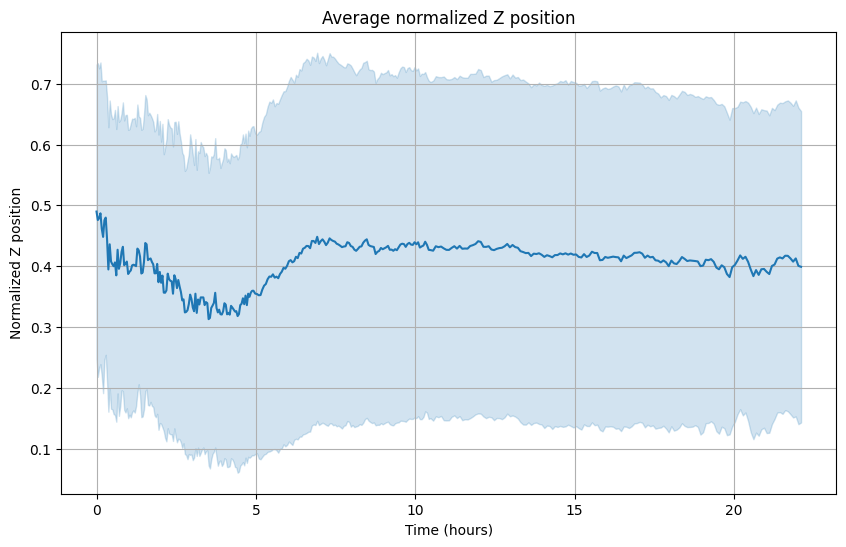

In [40]:
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=full_df,
    x='t_hours', 
    y='POSITION_Z_norm',
    estimator='mean',  # Averaging Z_norm for each (cell_type, t_hours)
    errorbar='sd'
    #ci=None#'sd'  # Show standard deviation as shaded region (set to None to remove)
)

# Customize labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Normalized Z position')
plt.title('Average normalized Z position')
plt.grid(True)
plt.show()


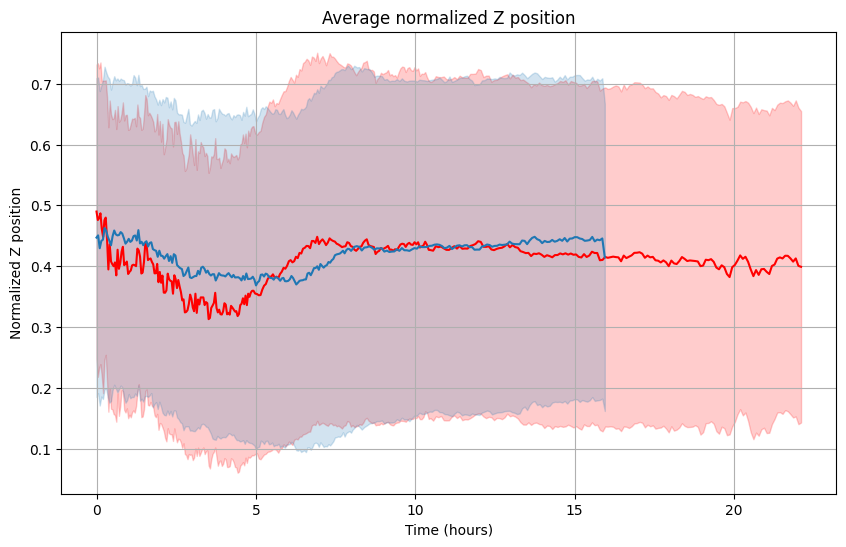

In [42]:
# Create the line plot
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=full_df,
    x='t_hours', 
    y='POSITION_Z_norm',
    color = 'red',
    estimator='mean',  # Averaging Z_norm for each (cell_type, t_hours)
    errorbar='sd'
    #ci=None#'sd'  # Show standard deviation as shaded region (set to None to remove)
)

sns.lineplot(
    data=full_df2,
    x='t_hours', 
    y='POSITION_Z_norm',
    estimator='mean',  # Averaging Z_norm for each (cell_type, t_hours)
    errorbar='sd'
    #ci=None#'sd'  # Show standard deviation as shaded region (set to None to remove)
)

# Customize labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Normalized Z position')
plt.title('Average normalized Z position')
plt.grid(True)
plt.show()


In [61]:
manual_df = full_df[full_df['annotation'] == 'manual']

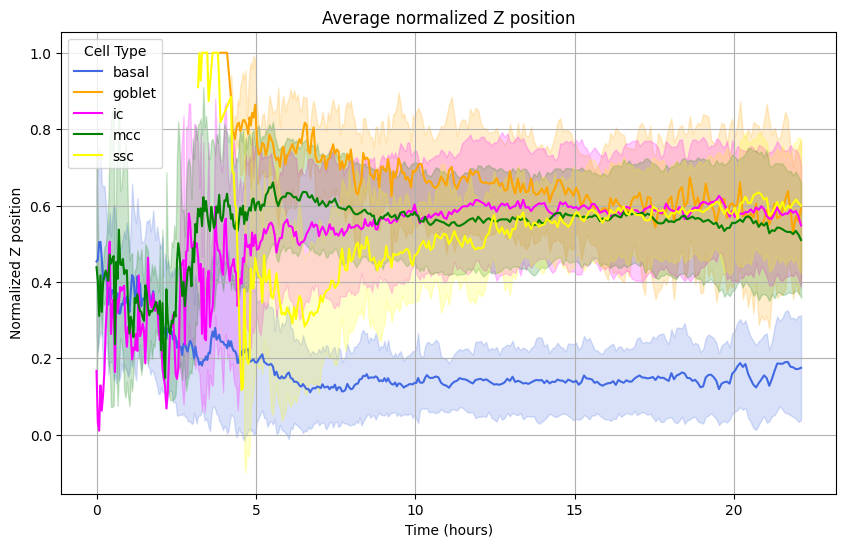

In [ ]:
# Ensure 't_hours' is sorted correctly
manual_df = manual_df.sort_values(['cell_type', 't_hours'])

# Define a custom color dictionary for cell types
custom_colors = {
    'basal': 'royalblue',  
    'goblet': 'orange',  
    'ic': 'magenta',  
    'mcc': 'green',
    'ssc' : 'yellow'   
}


# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=manual_df,
    x='t_hours', 
    y='POSITION_Z_norm', 
    hue='cell_type',  # Different colors for each cell type
    palette=custom_colors,
    estimator='mean',  # Averaging Z_norm for each (cell_type, t_hours)
    errorbar='sd'
    #ci=None#'sd'  # Show standard deviation as shaded region (set to None to remove)
)

# Customize labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Normalized Z position')
plt.title('Average normalized Z position')
plt.legend(title='Cell Type')
plt.grid(True)
plt.savefig('plots_15_03/celltype_Z_position.pdf')
plt.show()
manual_df = full_df[full_df['annotation'] == 'manual']

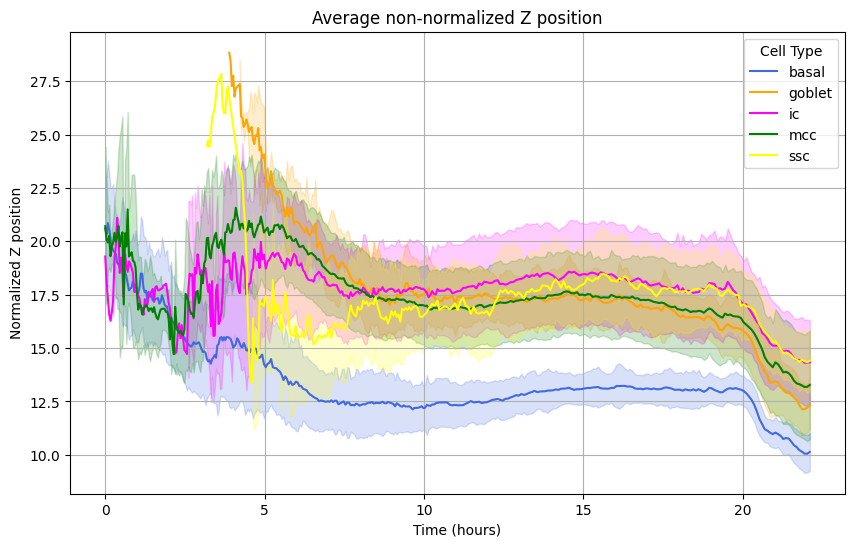

In [44]:
# Ensure 't_hours' is sorted correctly
manual_df = manual_df.sort_values(['cell_type', 't_hours'])

# Define a custom color dictionary for cell types
custom_colors = {
    'basal': 'royalblue',  
    'goblet': 'orange',  
    'ic': 'magenta',  
    'mcc': 'green',
    'ssc' : 'yellow'   
}


# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=manual_df,
    x='t_hours', 
    y='POSITION_Z', 
    hue='cell_type',  # Different colors for each cell type
    palette=custom_colors,
    estimator='mean',  # Averaging Z_norm for each (cell_type, t_hours)
    errorbar='sd'
    #ci=None#'sd'  # Show standard deviation as shaded region (set to None to remove)
)

# Customize labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Normalized Z position')
plt.title('Average non-normalized Z position')
plt.legend(title='Cell Type')
plt.grid(True)
plt.show()


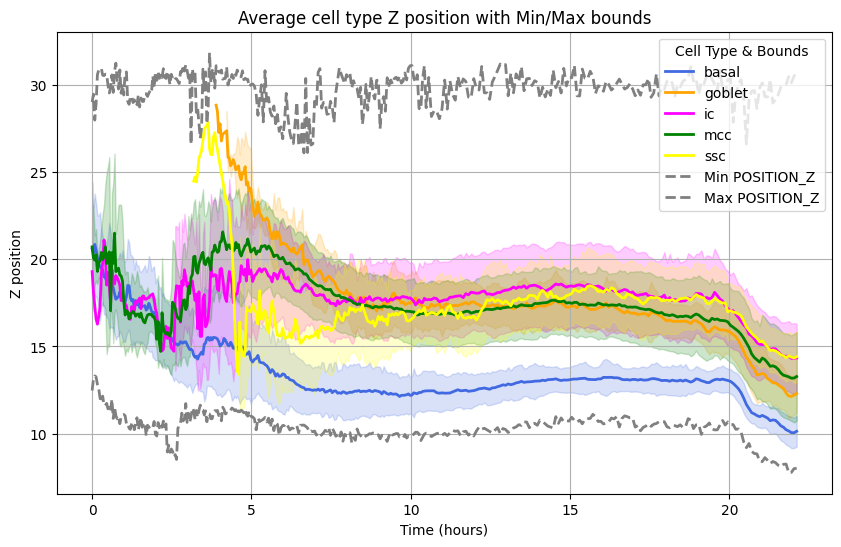

In [45]:
# Ensure 't_hours' is sorted correctly in both dataframes
manual_df = manual_df.sort_values(['cell_type', 't_hours'])
full_df = full_df.sort_values(['t_hours'])

# Define a custom color dictionary for cell types
custom_colors = {
    'basal': 'royalblue',  
    'goblet': 'orange',  
    'ic': 'magenta',  
    'mcc': 'green',
    'ssc' : 'yellow'   
}

# Compute min and max POSITION_Z per time point
min_max_df = full_df.groupby('t_hours')['POSITION_Z'].agg(['min', 'max']).reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))

# Plot the mean POSITION_Z per cell type from manual_df
sns.lineplot(
    data=manual_df,
    x='t_hours', 
    y='POSITION_Z', 
    hue='cell_type',  # Different colors for each cell type
    palette=custom_colors,
    estimator='mean',  # Averaging POSITION_Z for each (cell_type, t_hours)
    errorbar='sd',  # Show standard deviation as shaded region
    linewidth=2
)

# Plot the min and max POSITION_Z from full_df
plt.plot(min_max_df['t_hours'], min_max_df['min'], label="Min POSITION_Z", color="gray", linestyle="dashed", linewidth=2)
plt.plot(min_max_df['t_hours'], min_max_df['max'], label="Max POSITION_Z", color="gray", linestyle="dashed", linewidth=2)

# Customize labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Z position')
plt.title('Average cell type Z position with Min/Max bounds') 
plt.legend(title='Cell Type & Bounds')
plt.grid(True)

plt.show()


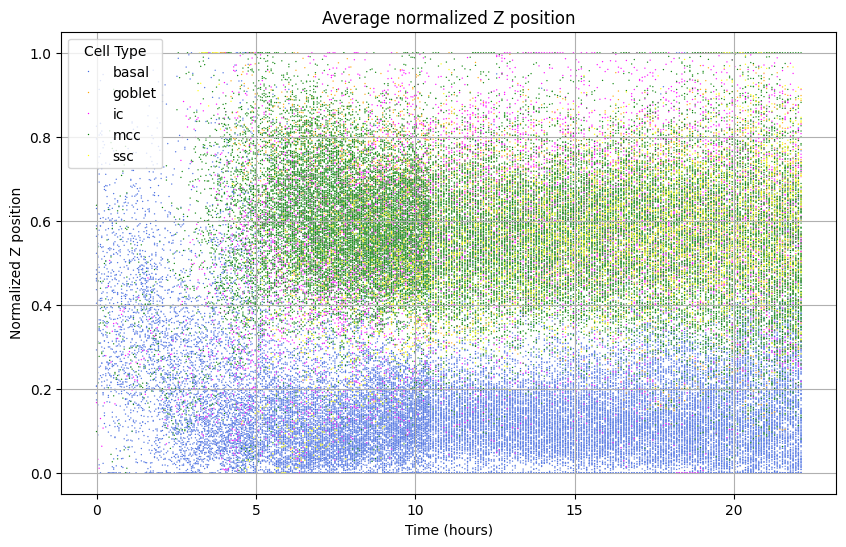

In [46]:
# Create the line plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=manual_df,
    x='t_hours', 
    y='POSITION_Z_norm', 
    hue='cell_type',  # Different colors for each cell type
    palette=custom_colors,
    s = 1
)

# Customize labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Normalized Z position')
plt.title('Average normalized Z position')
plt.legend(title='Cell Type')
plt.grid(True)
plt.show()


### Plotting Z position as violin plots

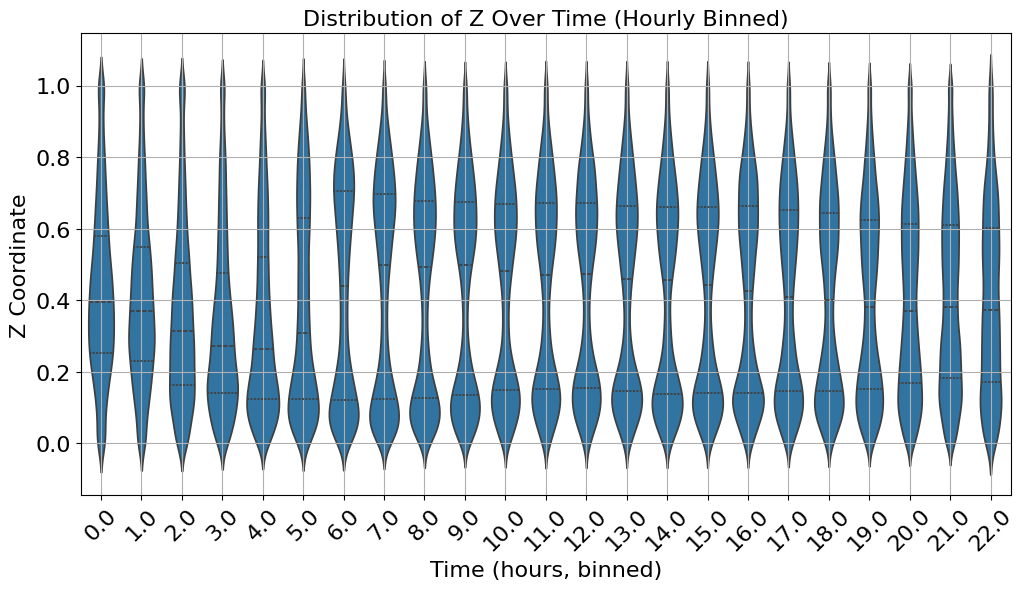

In [34]:
# Define hourly bins
full_df['hour_bin'] = (full_df['t_hours'] // 1) * 1

# Plot violin plot with hourly bins
plt.figure(figsize=(12, 6))
sns.violinplot(x=full_df['hour_bin'], y=full_df['POSITION_Z_norm'], inner='quartile')

plt.xlabel("Time (hours, binned)")
plt.ylabel("Z Coordinate")
plt.title("Distribution of Z Over Time (Hourly Binned)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


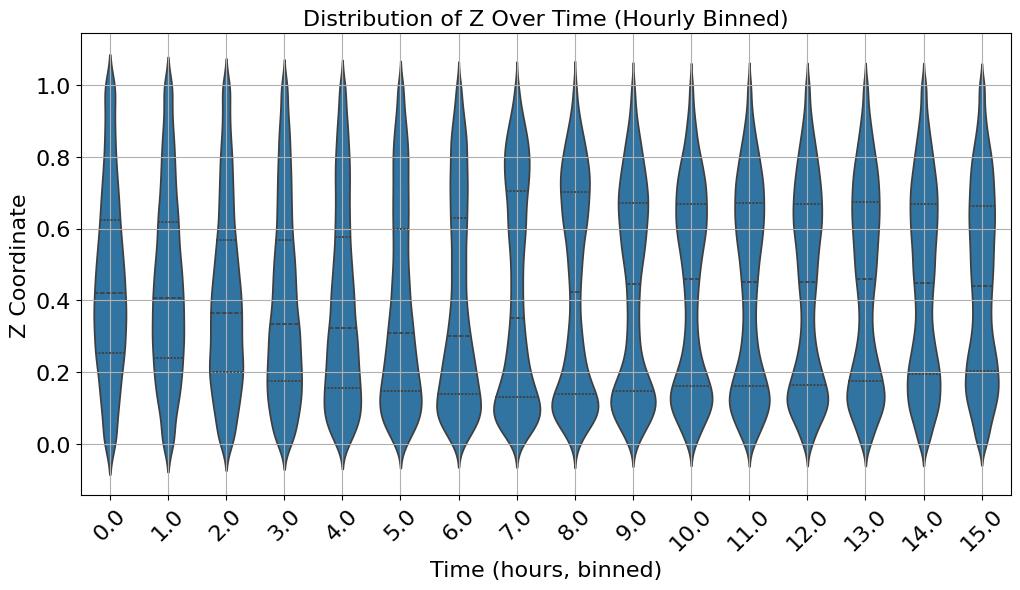

In [35]:
# Define hourly bins
full_df2['hour_bin'] = (full_df2['t_hours'] // 1)

# Plot violin plot with hourly bins
plt.figure(figsize=(12, 6))
sns.violinplot(x=full_df2['hour_bin'], y=full_df2['POSITION_Z_norm'], inner='quartile')

plt.xlabel("Time (hours, binned)")
plt.ylabel("Z Coordinate")
plt.title("Distribution of Z Over Time (Hourly Binned)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


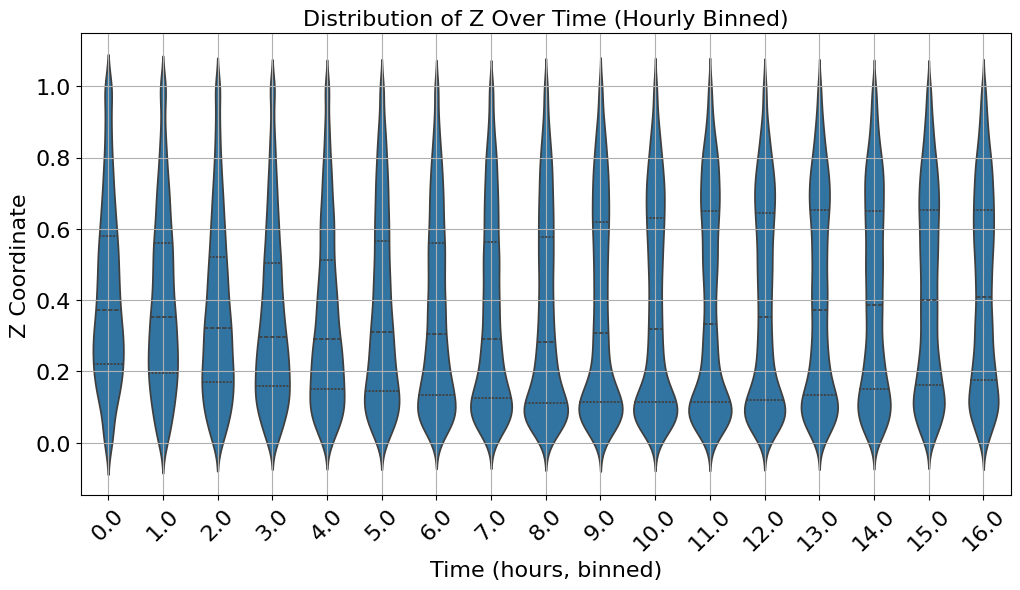

In [36]:
# Define hourly bins
full_df3['hour_bin'] = (full_df3['t_hours'] // 1)

# Plot violin plot with hourly bins
plt.figure(figsize=(12, 6))
sns.violinplot(x=full_df3['hour_bin'], y=full_df3['POSITION_Z_norm'], inner='quartile')

plt.xlabel("Time (hours, binned)")
plt.ylabel("Z Coordinate")
plt.title("Distribution of Z Over Time (Hourly Binned)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


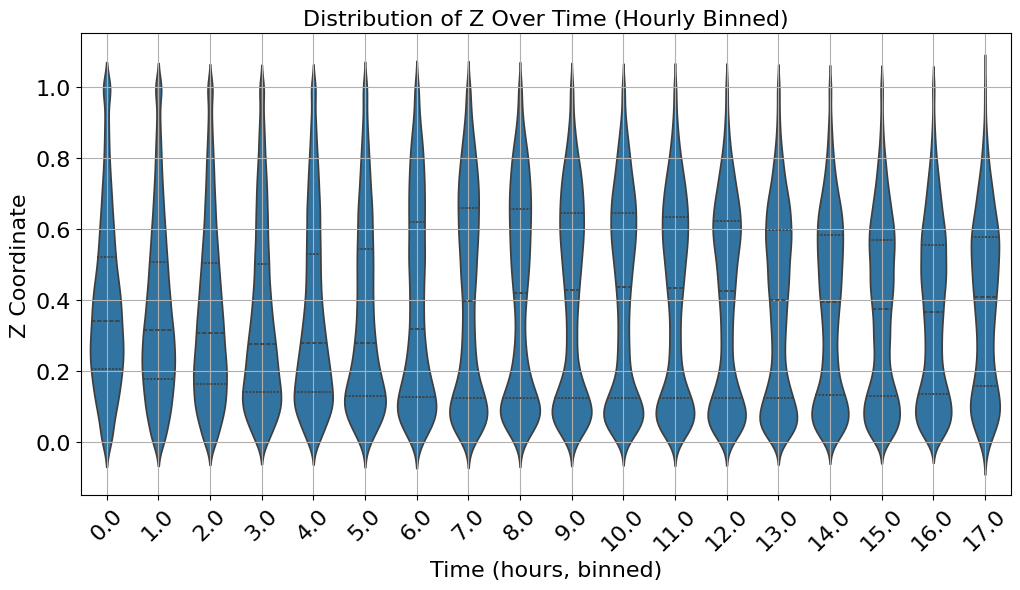

In [37]:
# Define hourly bins
full_df4['hour_bin'] = (full_df4['t_hours'] // 1)

# Plot violin plot with hourly bins
plt.figure(figsize=(12, 6))
sns.violinplot(x=full_df4['hour_bin'], y=full_df4['POSITION_Z_norm'], inner='quartile')

plt.xlabel("Time (hours, binned)")
plt.ylabel("Z Coordinate")
plt.title("Distribution of Z Over Time (Hourly Binned)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [39]:
full_df2['Experiment'] = 1

full_df['Experiment'] = 2

full_df3['Experiment'] = 3

full_df4['Experiment'] = 4

In [40]:
combined_df = pd.concat([full_df[['t_hours', 'hour_bin', 'POSITION_Z_norm', 'Experiment']], full_df2[['t_hours', 'hour_bin', 'POSITION_Z_norm', 'Experiment']], full_df3[['t_hours', 'hour_bin', 'POSITION_Z_norm', 'Experiment']], full_df4[['t_hours', 'hour_bin', 'POSITION_Z_norm', 'Experiment']]], axis=0)

In [41]:
combined_df1 = pd.concat([full_df[['t_hours', 'hour_bin', 'POSITION_Z_norm', 'Experiment']], full_df2[['t_hours', 'hour_bin', 'POSITION_Z_norm', 'Experiment']]], axis=0)
combined_df2 = pd.concat([full_df3[['t_hours', 'hour_bin', 'POSITION_Z_norm', 'Experiment']], full_df4[['t_hours', 'hour_bin', 'POSITION_Z_norm', 'Experiment']]], axis=0)

In [38]:
custom_palette = {
    1 : sns.color_palette('colorblind')[1],  # blue
    2 : sns.color_palette('colorblind')[0],  # orange
    3 : sns.color_palette('colorblind')[2],  # green
    4 : sns.color_palette('colorblind')[4]
}

# Plot violin plot with hourly bins
plt.figure(figsize=(12, 4))
sns.violinplot(data = combined_df1, x='hour_bin', y='POSITION_Z_norm', split = True, fill=False, linewidth = 2, inner='quartile', hue='Experiment', palette=custom_palette, alpha=0.5)
sns.violinplot(data = combined_df2, x='hour_bin', y='POSITION_Z_norm', split = True, fill=False, linewidth = 2, inner='quartile', hue='Experiment', palette=custom_palette, alpha=0.5)

plt.xlabel("Time (hours, binned)")
plt.ylabel("Z coordinate, normalized (A.U.)")
plt.title("Cell Z centroid coordinate distribution (binned hourly)")
plt.xticks(rotation=90)
plt.xlim(-0.5,16.5)
plt.grid(False)
plt.legend(title="Experiment", bbox_to_anchor=(1.00, 0.5))

# Adjust layout to fit legend
plt.tight_layout()  # Leaves space on the right
plt.savefig('plots_15_03/cell_z_distribution.pdf', bbox_inches='tight')
plt.show()


C:\Users\ghr283\AppData\Local\Temp\ipykernel_4332\4225593298.py:24: UserWarning: FigureCanvasPdf is non-interactive, and thus cannot be shown
  plt.show()


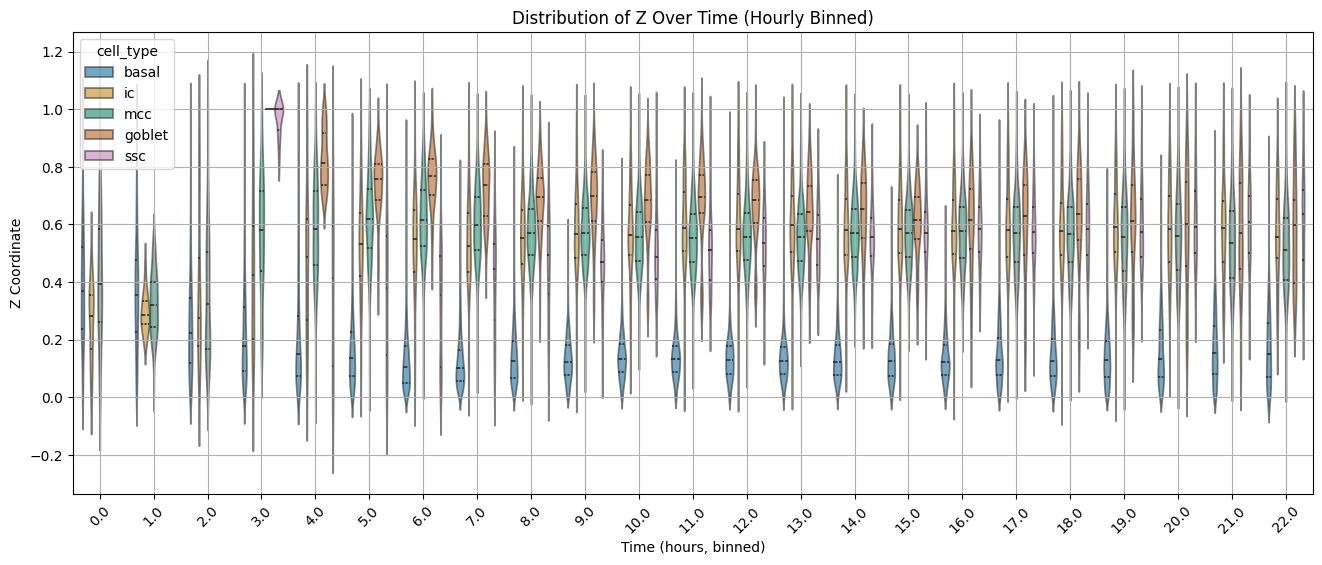

In [70]:
# Plot violin plot with hourly bins
plt.figure(figsize=(16, 6))
sns.violinplot(data = manual_df, x='hour_bin', y='POSITION_Z_norm', fill=True, inner='quartile', hue='cell_type', palette='colorblind', alpha = 0.6)

plt.xlabel("Time (hours, binned)")
plt.ylabel("Z Coordinate")
plt.title("Distribution of Z Over Time (Hourly Binned)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Define hourly bins
full_df2['hour_bin'] = (full_df2['t_hours'] // 1)

# Plot violin plot with hourly bins
plt.figure(figsize=(12, 6))
sns.violinplot(x=full_df['hour_bin'], y=full_df['POSITION_Z_norm'], fill = False, split = True, inner='quartile', color = 'red', alpha = 0.6, dodge=0.2)
sns.violinplot(x=full_df2['hour_bin'], y=full_df2['POSITION_Z_norm'], fill = False, split = True, inner='quartile', color = 'blue', alpha = 0.6)

plt.xlabel("Time (hours, binned)")
plt.ylabel("Z Coordinate")
plt.title("Distribution of Z Over Time (Hourly Binned)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Define save directory
violin_save_dir = "violin_plots"
os.makedirs(violin_save_dir, exist_ok=True)

# Get all unique cell types
all_cell_types = manual_df["cell_type"].unique()

# Loop over unique time points
for t in sorted(manual_df["t_hours"].unique()):
    plt.figure(figsize=(8, 6))

    # Filter data for current time point
    df_t = manual_df[manual_df["t_hours"] == t]

    # Ensure all cell types are present (even if empty)
    sns.violinplot(
        data=df_t,
        x="cell_type",
        y="POSITION_Z_norm",
        palette=custom_colors,
        order=all_cell_types,  # Ensures missing types appear
        scale="width"
    )

    # Format title and labels
    plt.title(f'Normalized Z position, t (hours) = {t:.2f}')
    plt.xlabel("Cell Type")
    plt.ylabel("Normalized Z Position")
    plt.ylim(-1, 2)

    # Save the figure
    plt.savefig(f"{violin_save_dir}/violin_plot_t_{t:.2f}.png")
    plt.close()
